In [2]:
import yfinance as yf
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
spy = yf.download("SPY", start="2010-01-01", end="2025-01-01")
time.sleep(5)
nvda = yf.download("NVDA", start="2010-01-01", end="2025-01-01")

In [32]:
x = yf.download("X",start="2010-01-01", end="2025-01-01")
x.to_csv("x.csv")

[*********************100%***********************]  1 of 1 completed


In [2]:
nvda.to_csv('nvda.csv')
spy.to_csv('spy.csv')

In [7]:
print(nvda.shape)
print(nvda.columns)
print(spy.columns)

(3774, 5)
MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])
MultiIndex([( 'Close', 'SPY'),
            (  'High', 'SPY'),
            (   'Low', 'SPY'),
            (  'Open', 'SPY'),
            ('Volume', 'SPY')],
           names=['Price', 'Ticker'])


In [30]:
print(spy.iloc[0].shape)
print(2*3774*2)

(8,)
15096


In [4]:
def load_data(file):
    xdat = pd.read_csv(file,skiprows=2)

    xdat.columns = ['Date','Close','High','Low','Open','Volume']
    xdat['Date'] = pd.to_datetime(xdat['Date'])
    
    return xdat

In [7]:
def plot_data(xdat:pd.DataFrame):
    plt.plot(xdat['Date'],xdat['Close'])
    plt.title("Prices")
    plt.show()

    xdat['logReturns'] = np.log1p(xdat.Close).diff()
    xdat['Squared_logReturns'] = (xdat.logReturns)**2

    plt.plot(xdat['Date'],xdat['logReturns'])
    plt.title("log-Returns")
    plt.show()

    plt.plot(xdat['Date'],xdat['Squared_logReturns'])
    plt.title("Squared log-Returns")
    plt.show()

# Asset 1

        Date     Close      High       Low      Open     Volume
0 2010-01-04  0.423884  0.426864  0.415172  0.424342  800204000
1 2010-01-05  0.430073  0.434658  0.422279  0.422279  728648000
2 2010-01-06  0.432825  0.433742  0.425718  0.429844  649168000
3 2010-01-07  0.424342  0.432366  0.421133  0.430532  547792000
4 2010-01-08  0.425259  0.428239  0.418382  0.420903  478168000


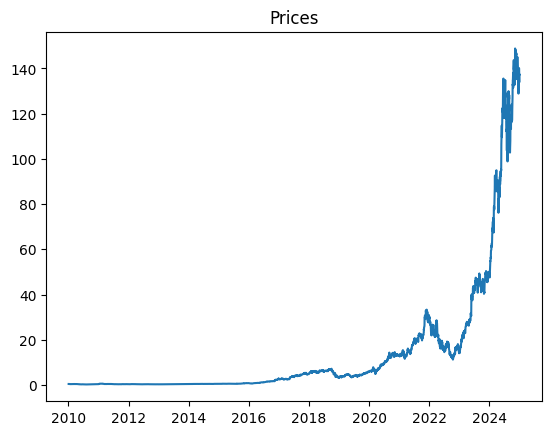

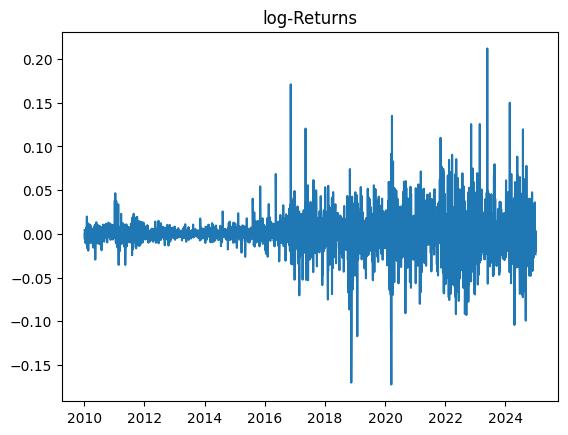

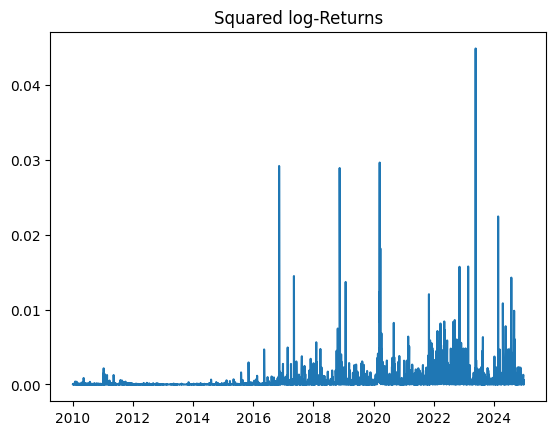

In [28]:
ticket = "nvda"
nvda = load_data(ticket+".csv")
print(nvda.head())
plot_data(nvda)

# Asset 2

        Date      Close       High        Low       Open     Volume
0 2010-01-04  85.768433  85.813839  84.391052  85.041903  118944600
1 2010-01-05  85.995483  86.033326  85.405178  85.715470  111579900
2 2010-01-06  86.056015  86.267919  85.844111  85.912221  116074400
3 2010-01-07  86.419296  86.525248  85.654924  85.897101  131091100
4 2010-01-08  86.706879  86.744721  86.018191  86.192253  126402800


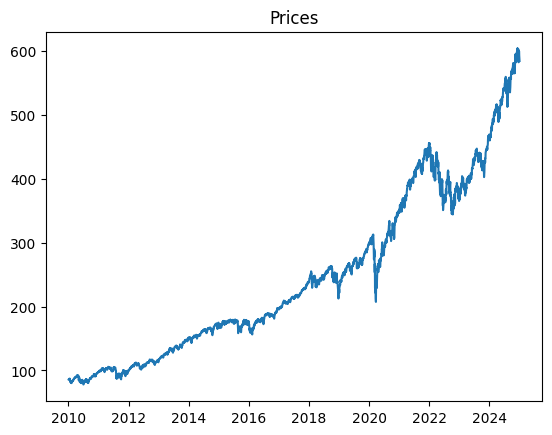

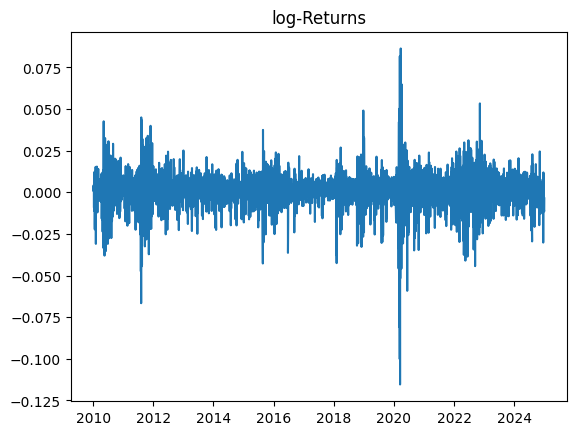

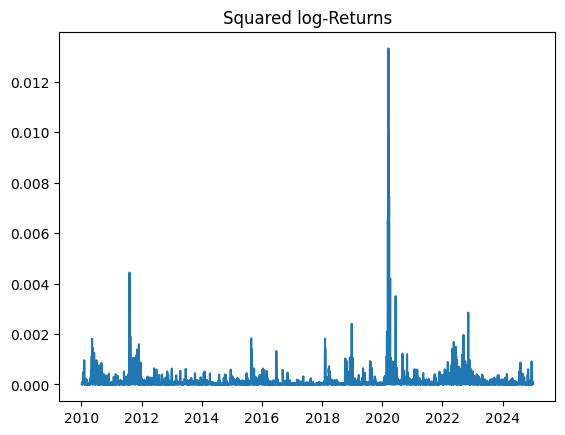

In [29]:
ticket = "spy"
nvda = load_data(ticket+".csv")
print(nvda.head())
plot_data(nvda)

# Risk Comparison

In [61]:
data = pd.read_csv("x.csv",skiprows=[1,2])
prices = data["Close"]
returns = (prices / prices.shift(1)) - 1
returns = returns.fillna(0)
x_r = returns

In [62]:
data = pd.read_csv("spy.csv",skiprows=[1,2])
prices = data["Close"]
returns = (prices / prices.shift(1)) - 1
returns = returns.fillna(0)
spy_r = returns

In [63]:
data = pd.read_csv("nvda.csv",skiprows=[1,2])
prices = data["Close"]
returns = (prices / prices.shift(1)) - 1
returns = returns.fillna(0)
nvda_r = returns

In [80]:
mean_spy=spy_r.expanding().mean()
mean_x=x_r.expanding().mean()
mean_nvda=nvda_r.expanding().mean()

print("NaN in mean_spy:", mean_spy.isna().sum())
print("NaN in mean_x:", mean_x.isna().sum())
print("NaN in mean_nvda:", mean_nvda.isna().sum())

print("Length of mean_spy:", len(mean_spy))
print("Length of mean_x:", len(mean_x))
print("Length of mean_nvda:", len(mean_nvda))

NaN in mean_spy: 0
NaN in mean_x: 0
NaN in mean_nvda: 0
Length of mean_spy: 3774
Length of mean_x: 3774
Length of mean_nvda: 3774


In [ ]:
b = mean_spy>mean_x
print(np.sum(b)/len(b))

0.9268680445151033


In [72]:
b = mean_spy>mean_nvda 
print(np.sum(b)/len(b))

0.3677795442501325


In [73]:
b = mean_nvda>mean_x 
print(np.sum(b)/len(b))

0.9372019077901431


c:\Users\panal\AppData\Local\Programs\Python\Python312\enviroments\ai-finance\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\panal\AppData\Local\Programs\Python\Python312\enviroments\ai-finance\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


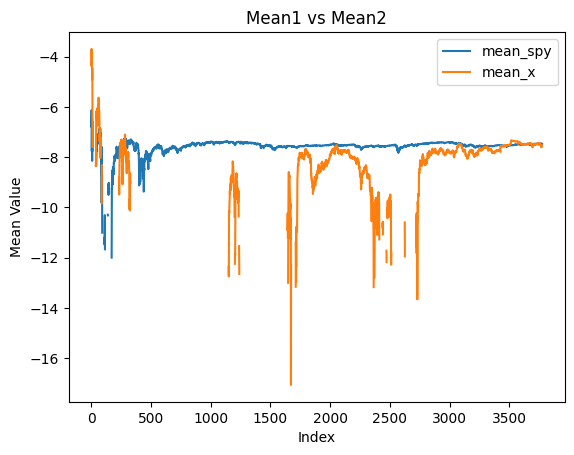

In [78]:
plt.plot(np.log(mean_spy), label='mean_spy')
plt.plot(np.log(mean_x), label='mean_x')
plt.title('Mean1 vs Mean2')
plt.xlabel('Index')
plt.ylabel('Mean Value')
plt.legend()
plt.show()